#### **Найти значения интерполяционного полинома для различных n.**

In [101]:
import numpy as np
import matplotlib.pyplot as plt

Для начала работы, запишем все данные:

In [102]:
def f(x):
    return 1 / (1 + 25 * x**2)

def xi(i, n):
    return -1 + (2 * i) / n

Используем переменные a и b для хранения пределов, в которых находится корень:

In [103]:
a = -1
b = 1

Интерполяционный полином Лагранжа:

In [104]:
def Lnk(n, k, x, xi=xi):
    ans = 1

    for i in range(k):
        ans *= (x - xi(i, n))
    for i in range(k + 1, n + 1):
        ans *= (x - xi(i, n))

    return ans

def L(n, x, func=f, xi=xi):
    ans = 0
    
    for i in range(n + 1):
        ans += func(xi(i, n)) * Lnk(n, i, x, xi=xi) / Lnk(n, i, xi(i, n), xi=xi)
    
    return ans

Подставляя в различные Х при нужном n, будем получать значение полинома. Здесь Х - параметр, а n - порядок.

Чтобы проверить работу метода, найдём Х в промежутке от -1 до 1 с помощью метода бисекции, а затем подставим его в полиномы разной степени:

In [105]:
def bisection(a, b, func):
    eps = 1e-10

    while b - a > eps:
        c = (a + b) / 2
        if func(a) * func(c) < 0: b = c
        else: a = c

    return c

In [106]:
x = bisection(a, b, f)
x

0.9999999999417923

Посмотрим на значения функций при увеличении порядка:

In [107]:
print(f(x), L(5, x), L(20, x))

0.03846153846584376 0.03846153838318201 0.03846118418877048


Посмотрим, как функция ведёт себя вместе с полиномами. 

Пятой степени:

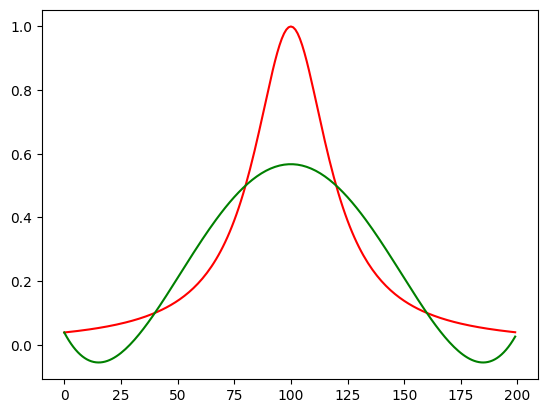

In [108]:
x_test = np.arange(-1, 1, 0.01)

plt.plot(f(x_test), color='red')
plt.plot(L(5, x_test), color='green')


plt.show()

Двадцатой степени:

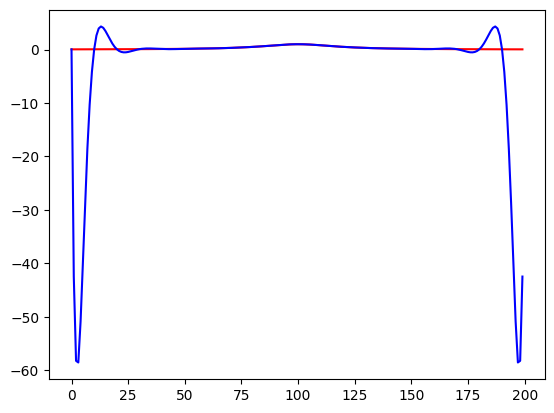

In [109]:
plt.plot(f(x_test), color='red')
plt.plot(L(20, x_test), color='blue')

plt.show()

Проверим на узлах Чебышева, задающихся следующей формулой:

In [110]:
def xi_ch(i, n):
    return np.cos(((2 * i) / (2 * n) ) * np.pi)

In [111]:
print(f(x), L(20, x, xi=xi_ch))

0.03846153846584376 0.03846153844932782


Посмотрим на сходимость:

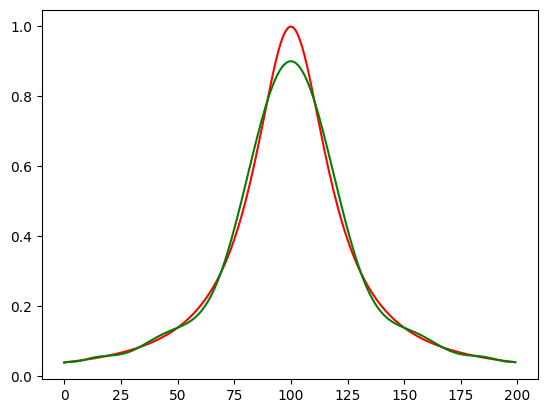

In [113]:
plt.plot(f(x_test), color='red')
plt.plot(L(15, x_test, xi=xi_ch), color='green')


plt.show()

Cходится!!